In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.dropna().isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [7]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
df["User_ID"].nunique()

5891

In [10]:
df["Product_ID"].nunique()

3623

In [11]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [12]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [14]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
df["Marital_Status"].unique()

array([0, 1])

In [17]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [18]:
df["Purchase"].sum()/len(df["Purchase"])

np.float64(9333.859852635065)

In [19]:
for column in df.columns:
    print(df[column].nunique(), "\t: ", column)

5891 	:  User_ID
3623 	:  Product_ID
2 	:  Gender
7 	:  Age
21 	:  Occupation
3 	:  City_Category
5 	:  Stay_In_Current_City_Years
2 	:  Marital_Status
18 	:  Product_Category_1
17959 	:  Purchase


In [20]:
data = pd.DataFrame({"Ratio" : [len(df[df["Gender"]== "M"]), len(df[df["Gender"]== "F"])]}, index = ["Male", "Female"])

<Axes: ylabel='Ratio'>

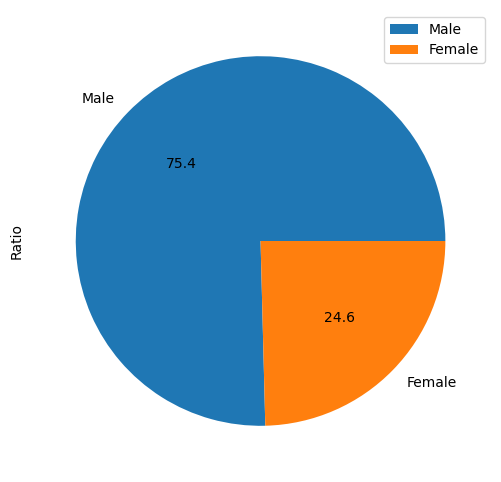

In [21]:
data.plot.pie(y = "Ratio", figsize = (6,6), autopct = "%.1f")

<Axes: title={'center': 'Gender Ratio'}>

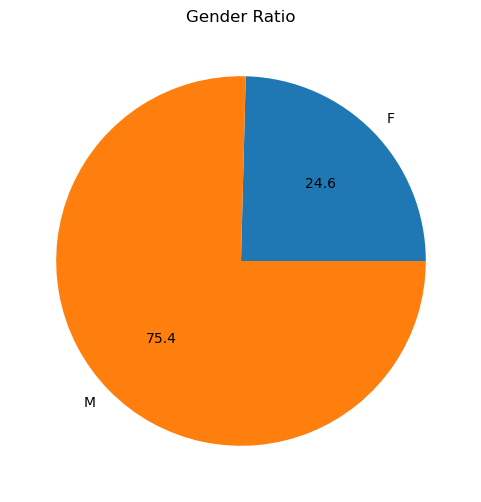

In [22]:
df.groupby("Gender").size().plot(kind = "pie",
                                 autopct = "%.1f",
                                 figsize = (6,6),
                                 title = "Gender Ratio")

<Axes: xlabel='Gender'>

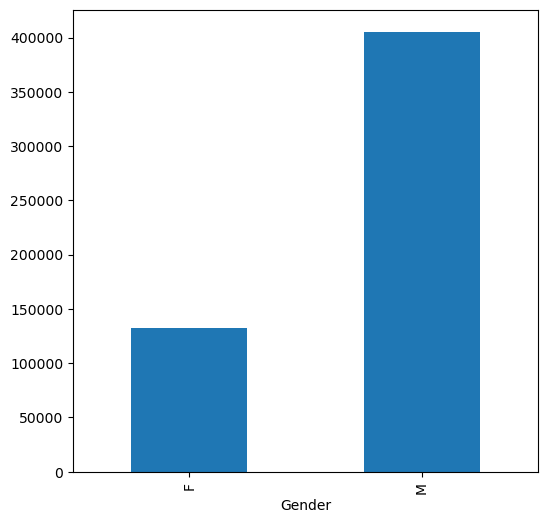

In [23]:
df.groupby("Gender").size().plot(kind = "bar",
                                 figsize = (6,6))

In [24]:
df.groupby("Gender").size()

Gender
F    132197
M    405380
dtype: int64

<Axes: ylabel='Purchase'>

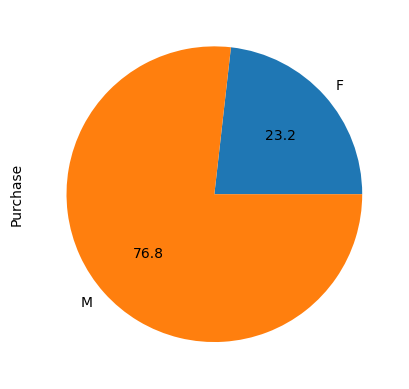

In [25]:
df.groupby("Gender")["Purchase"].sum().plot(kind = "pie", autopct = "%0.1f")

<Axes: ylabel='Purchase'>

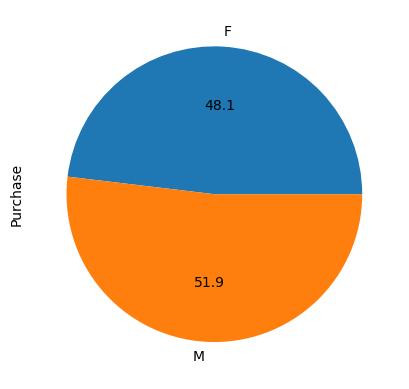

In [26]:
df.groupby("Gender")["Purchase"].mean().plot(kind = "pie", autopct = "%0.1f")

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

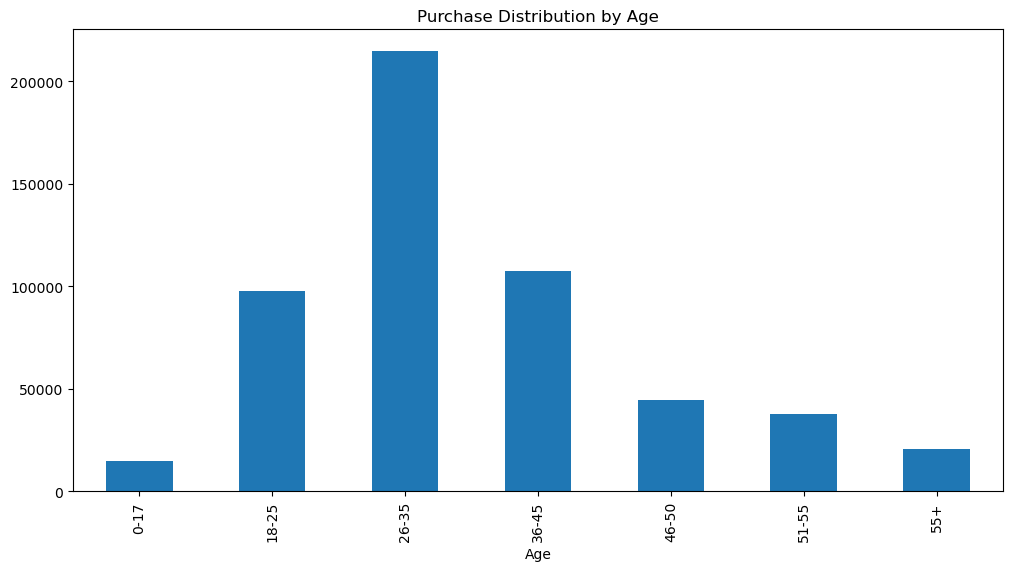

In [27]:
df.groupby("Age").size().plot(kind = "bar", figsize = (12,6), title = "Purchase Distribution by Age")

In [28]:
lst = []
for i in df["Age"].unique():
    lst.append([i, df[df["Age"] == i]["Product_ID"].nunique()])

data = pd.DataFrame(lst, columns = ["Age", "Product"])

<Axes: xlabel='Age'>

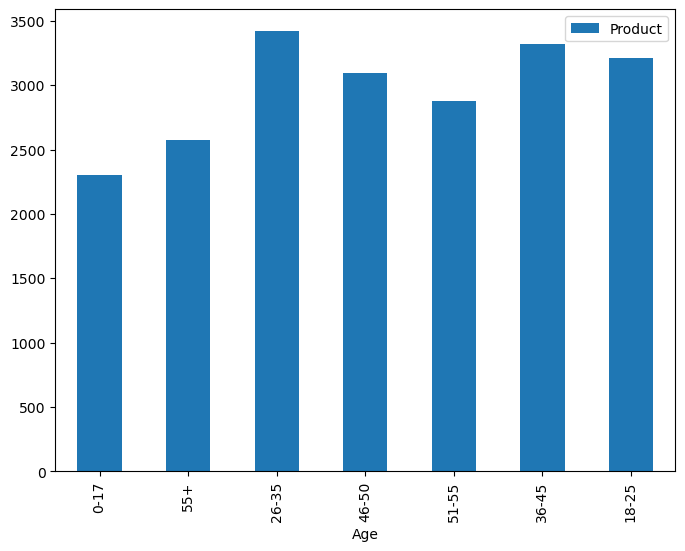

In [29]:
data.plot.bar(x = "Age", figsize = (8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

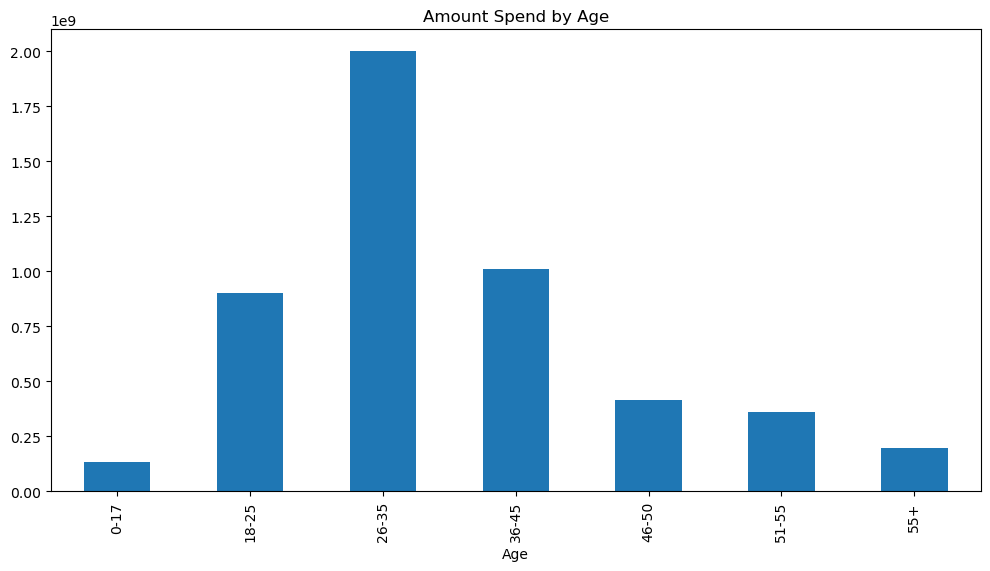

In [30]:
df.groupby("Age")["Purchase"].sum().plot(kind = "bar", figsize = (12,6), title = "Amount Spend by Age")

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

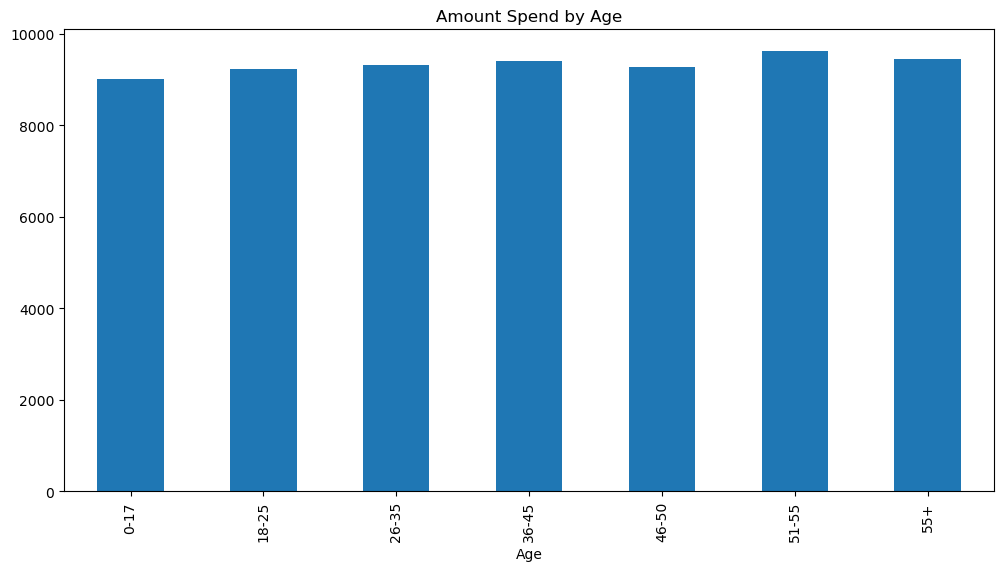

In [31]:
df.groupby("Age")["Purchase"].mean().plot(kind = "bar", figsize = (12,6), title = "Amount Spend by Age")

<Axes: ylabel='Purchase'>

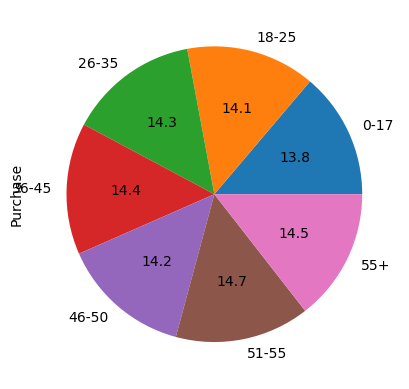

In [32]:
df.groupby("Age")["Purchase"].mean().plot(kind = "pie", autopct = "%0.1f")

<Axes: >

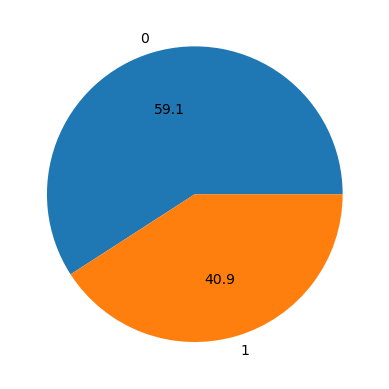

In [33]:
df.groupby("Marital_Status").size().plot(kind = "pie", autopct = "%0.1f")

<Axes: >

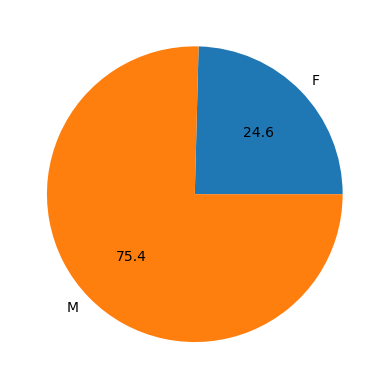

In [34]:
df.groupby("Gender").size().plot(kind = "pie", autopct = "%0.1f")

<Axes: xlabel='Age', ylabel='count'>

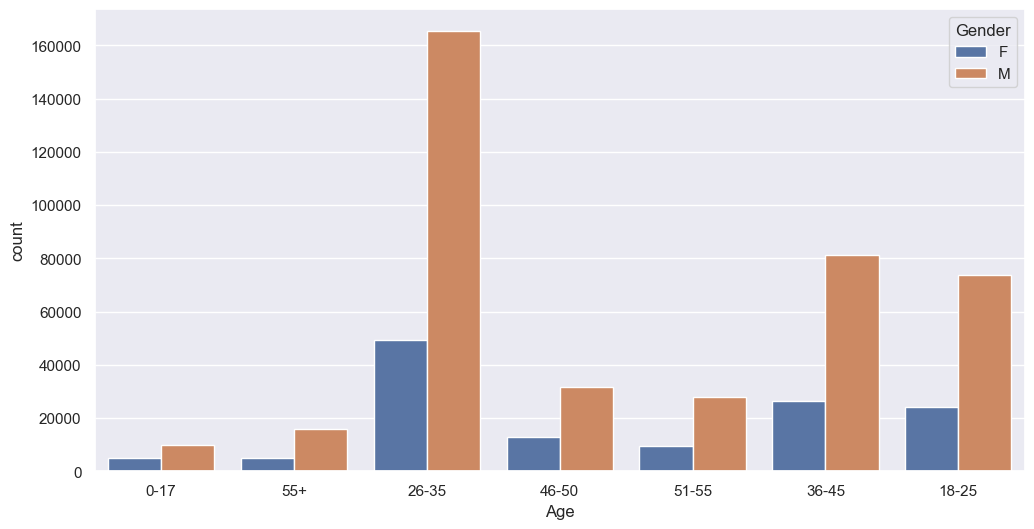

In [35]:
sns.set(rc = {"figure.figsize" : (12,6)})
sns.countplot(x = "Age", hue = "Gender", data = df)

<Axes: xlabel='Gender', ylabel='count'>

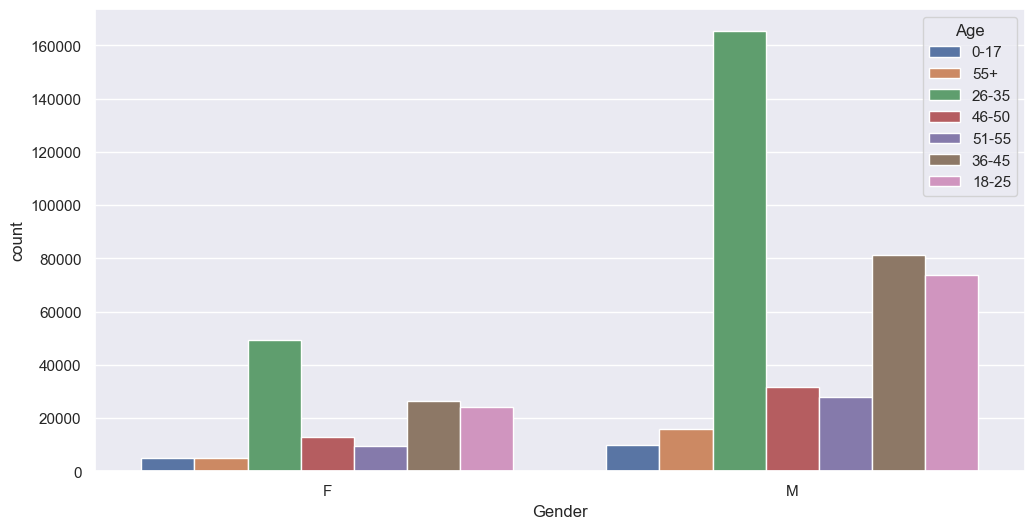

In [36]:
sns.set(rc = {"figure.figsize" : (12,6)})
sns.countplot(x = "Gender", hue = "Age", data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

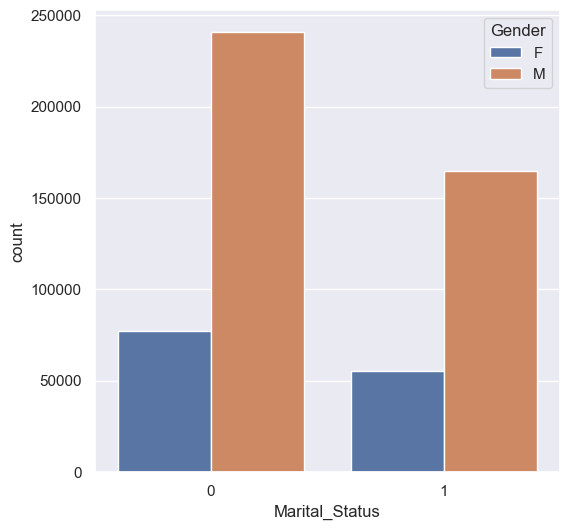

In [37]:
sns.set(rc = {"figure.figsize" : (6,6)})
sns.countplot(x = "Marital_Status", hue = "Gender", data = df)

<Axes: xlabel='City_Category', ylabel='count'>

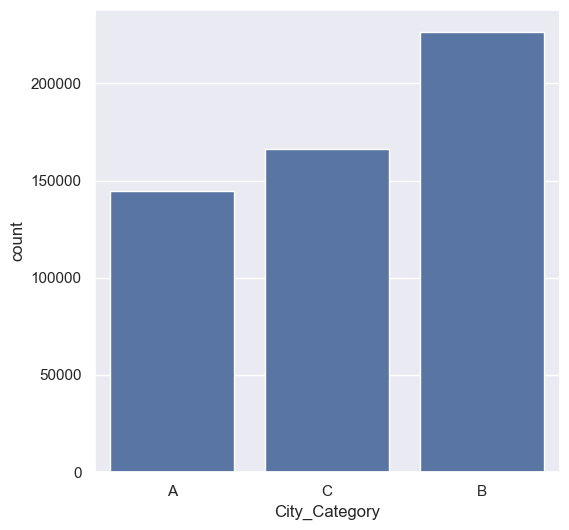

In [38]:
sns.countplot(x = df["City_Category"])

<Axes: xlabel='City_Category', ylabel='count'>

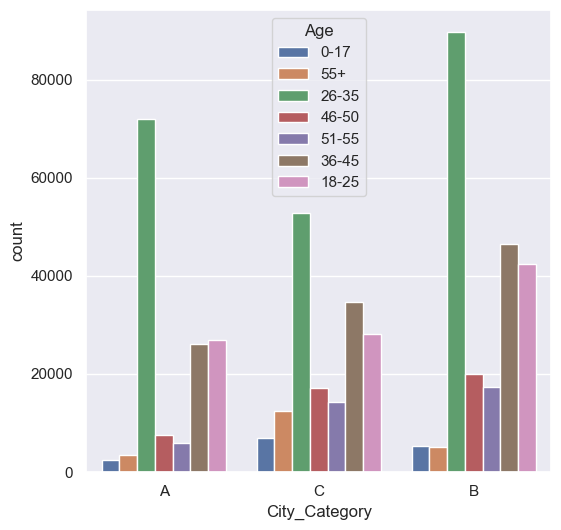

In [39]:
sns.countplot(x = "City_Category", hue = "Age", data = df)

<Axes: xlabel='Age', ylabel='count'>

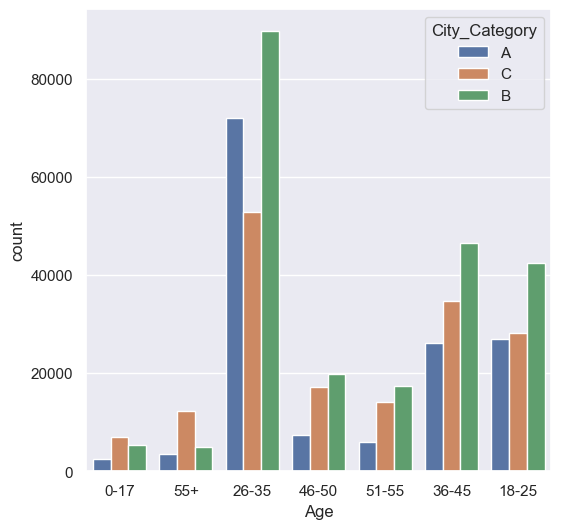

In [40]:
sns.countplot(x = "Age", hue = "City_Category", data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

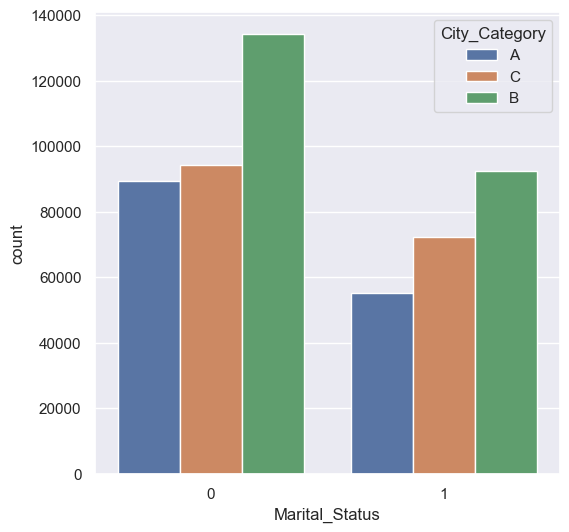

In [41]:
sns.countplot(x = "Marital_Status", hue = "City_Category", data = df)

<Axes: >

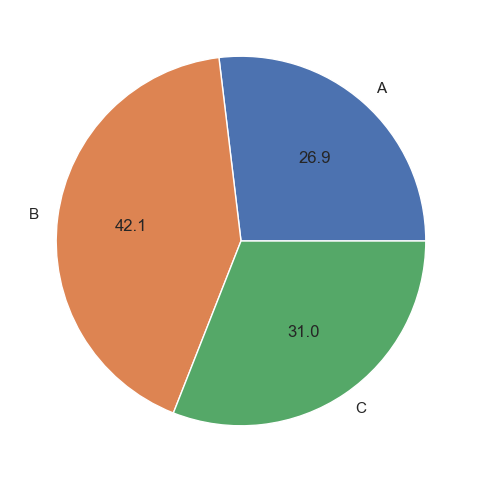

In [42]:
df.groupby("City_Category").size().plot(kind = "pie", autopct = "%0.1f")

<Axes: xlabel='City_Category', ylabel='count'>

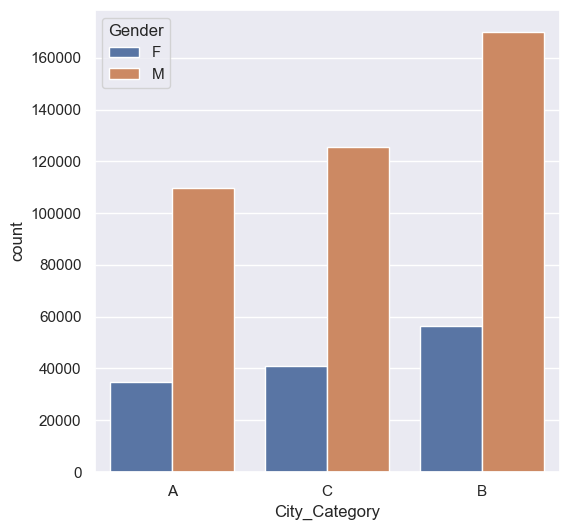

In [43]:
sns.countplot(x = "City_Category", hue = "Gender", data = df)

<Axes: ylabel='Purchase'>

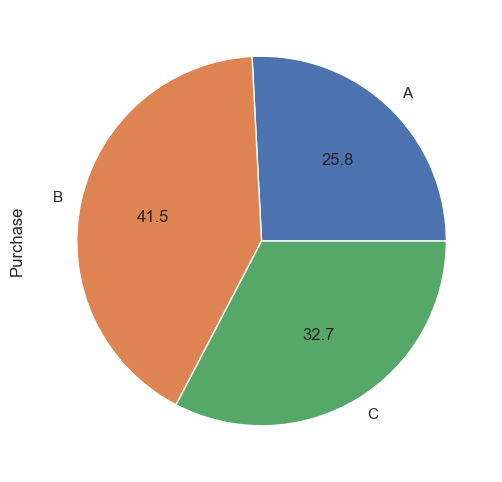

In [44]:
df.groupby("City_Category")["Purchase"].sum().plot(kind = "pie", autopct = "%0.1f")

<Axes: ylabel='Purchase'>

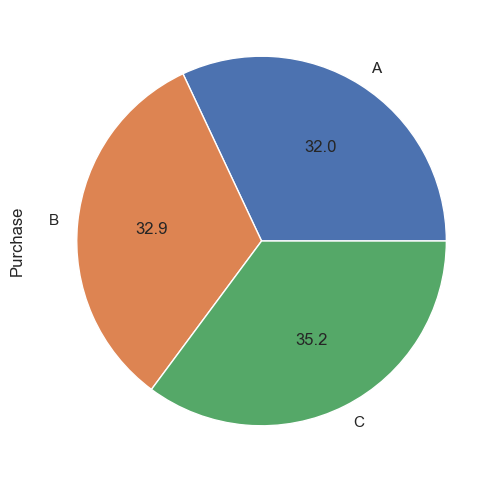

In [45]:
df.groupby("City_Category")["Purchase"].mean().plot(kind = "pie", autopct = "%0.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

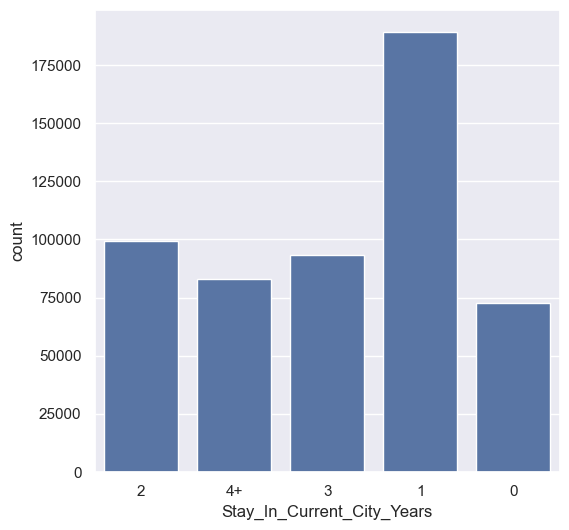

In [46]:
sns.countplot(x = df["Stay_In_Current_City_Years"])

<Axes: >

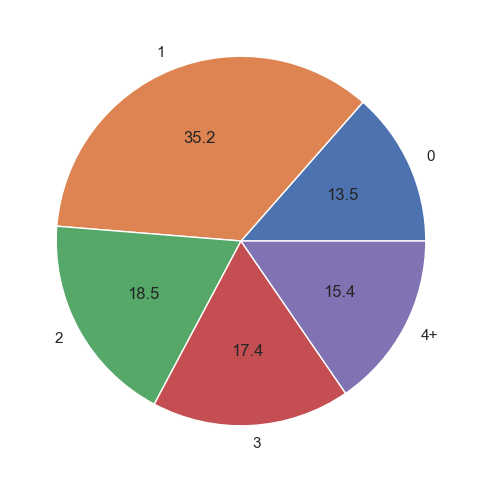

In [47]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind = "pie", autopct = "%0.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

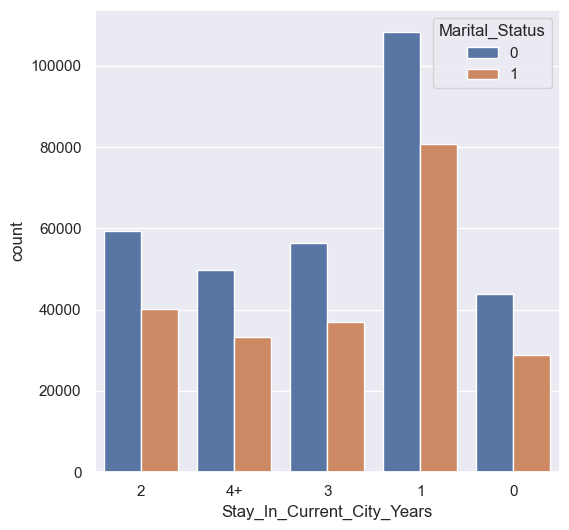

In [48]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "Marital_Status", data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

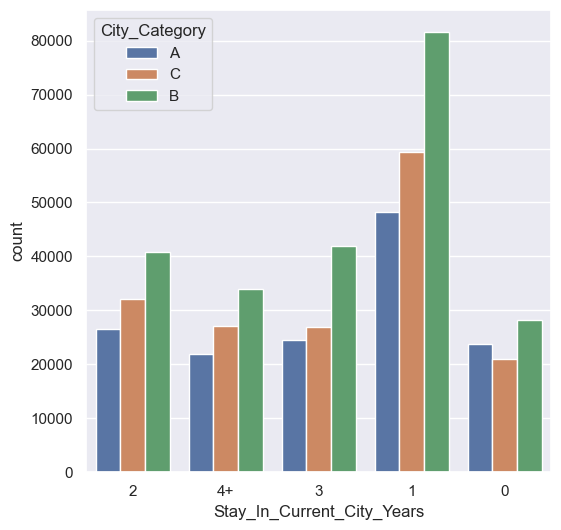

In [49]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "City_Category", data = df)

<Axes: xlabel='City_Category', ylabel='count'>

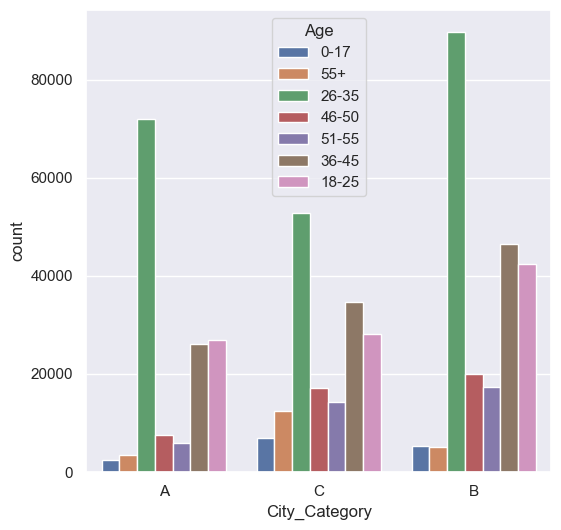

In [50]:
sns.countplot(x = "City_Category", hue = "Age", data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

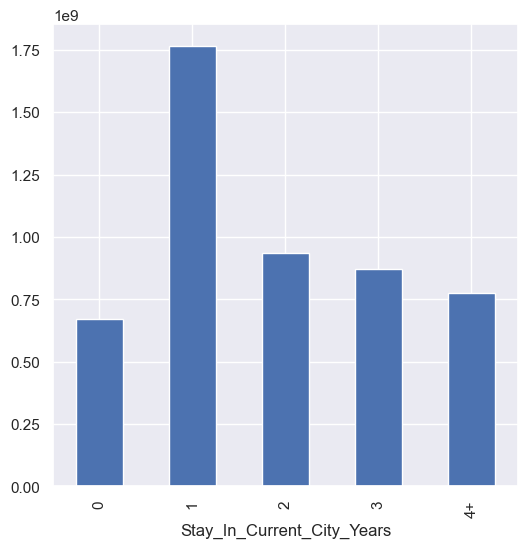

In [51]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind = "bar")

<Axes: xlabel='Stay_In_Current_City_Years'>

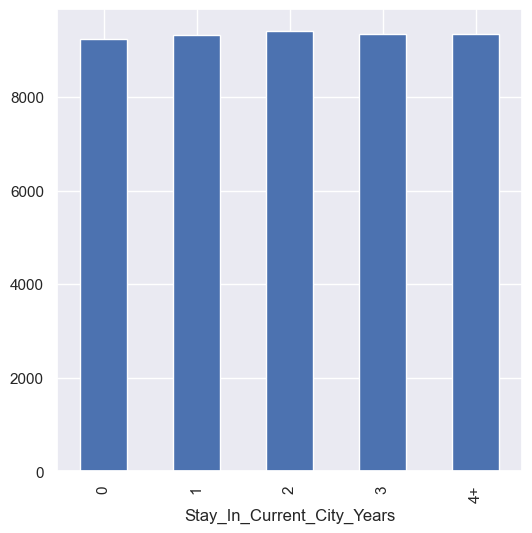

In [52]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind = "bar")

<Axes: xlabel='Occupation', ylabel='count'>

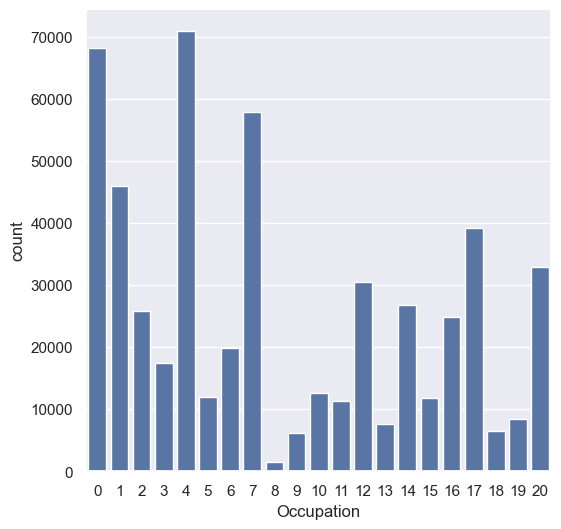

In [53]:
sns.countplot(x = df["Occupation"])

<Axes: xlabel='Occupation'>

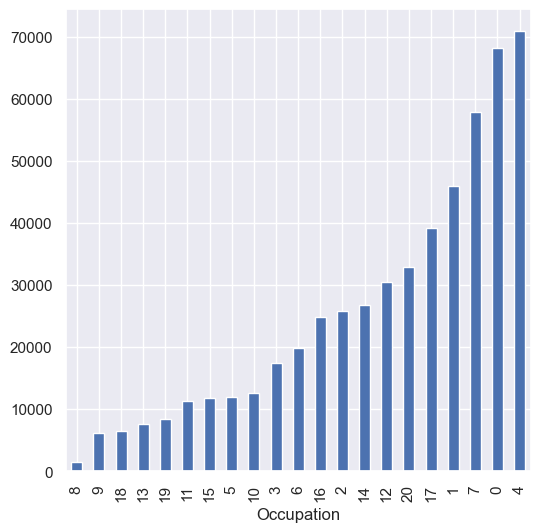

In [54]:
df.groupby("Occupation").size().sort_values().plot(kind = "bar")

<Axes: xlabel='Occupation'>

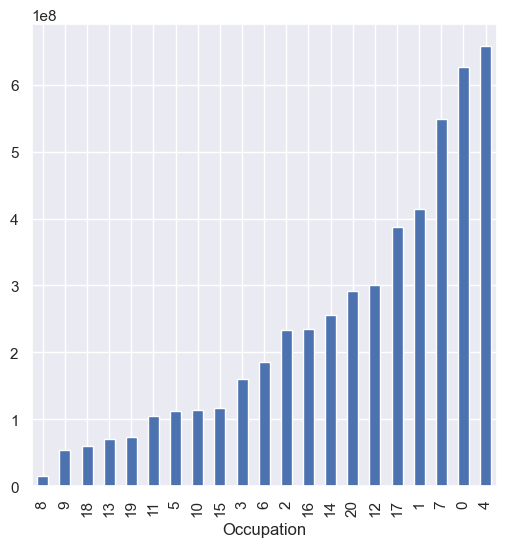

In [55]:
df.groupby("Occupation")["Purchase"].sum().sort_values().plot(kind = "bar")

<Axes: xlabel='Occupation'>

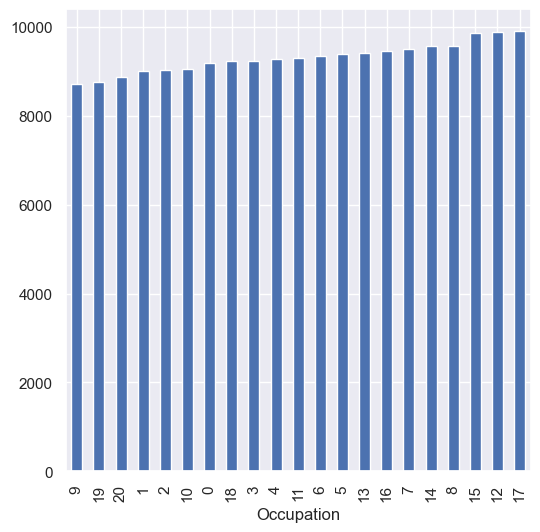

In [56]:
df.groupby("Occupation")["Purchase"].mean().sort_values().plot(kind = "bar")

<Axes: xlabel='Occupation', ylabel='count'>

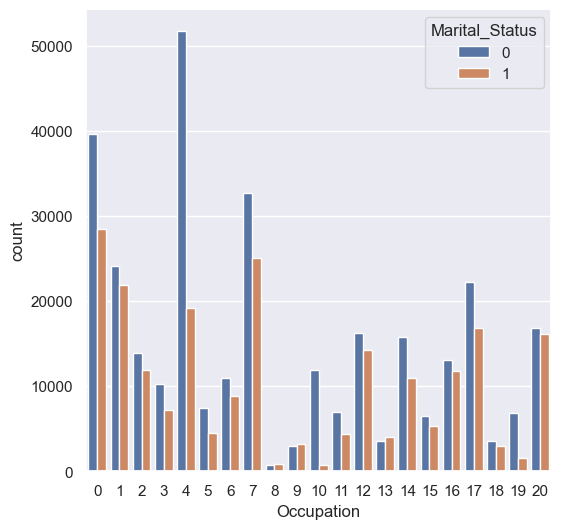

In [57]:
sns.countplot(x = "Occupation", hue = "Marital_Status", data = df)

<Axes: xlabel='Occupation', ylabel='count'>

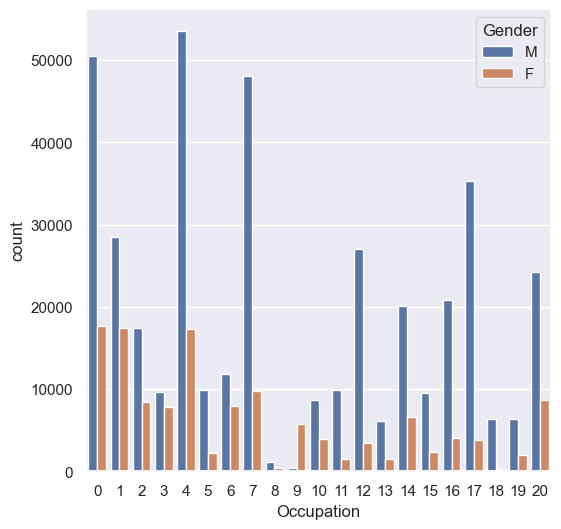

In [58]:
sns.countplot(x = "Occupation", hue = "Gender", data = df)

<Axes: xlabel='Occupation'>

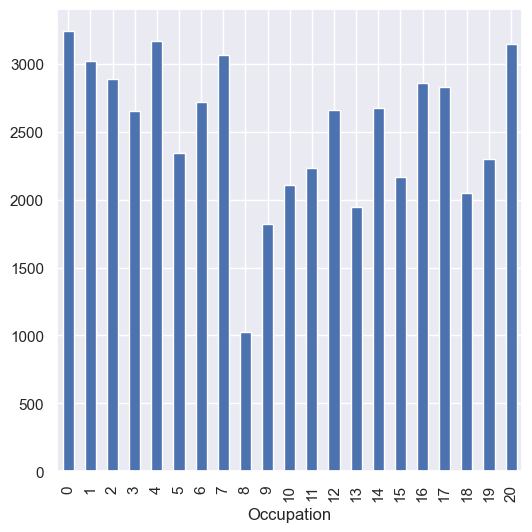

In [59]:
df.groupby("Occupation").nunique()["Product_ID"].plot(kind = "bar")

<Axes: xlabel='Occupation'>

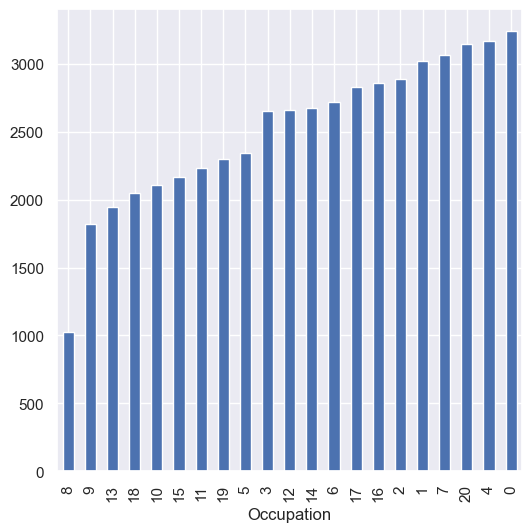

In [60]:
df.groupby("Occupation").nunique()["Product_ID"].sort_values().plot(kind = "bar")

<Axes: xlabel='Product_Category_1'>

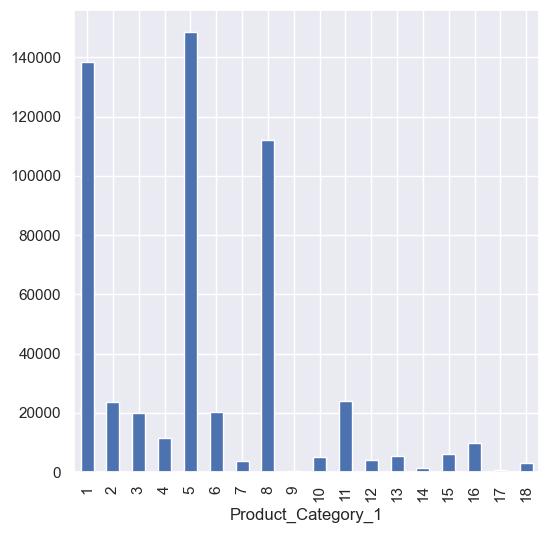

In [61]:
df.groupby("Product_Category_1").size().plot(kind = "bar")

<Axes: xlabel='Product_Category_1'>

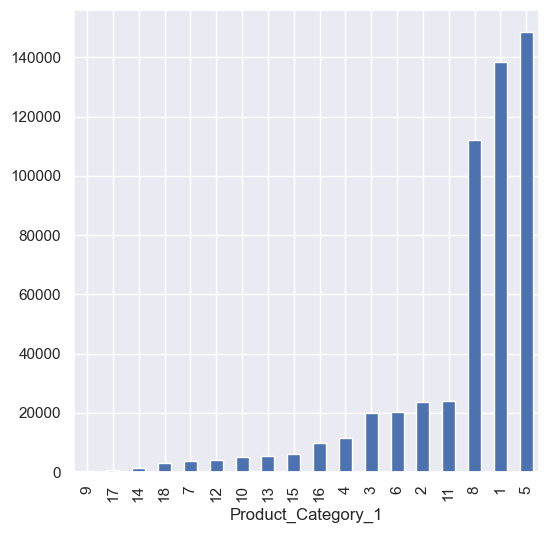

In [62]:
df.groupby("Product_Category_1").size().sort_values().plot(kind = "bar")

<Axes: xlabel='Product_Category_1'>

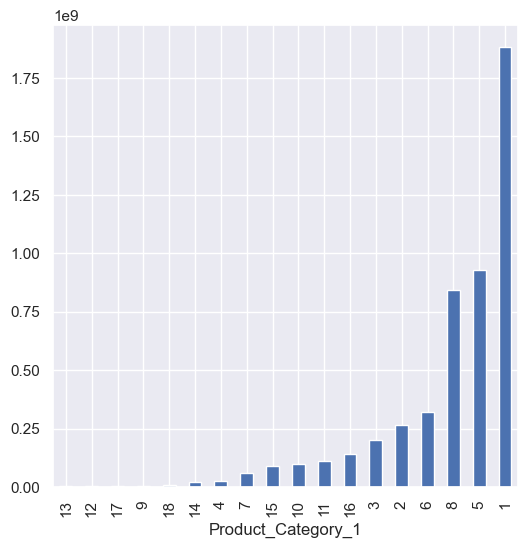

In [63]:
df.groupby("Product_Category_1")["Purchase"].sum().sort_values().plot(kind = "bar")

<Axes: xlabel='Product_Category_1'>

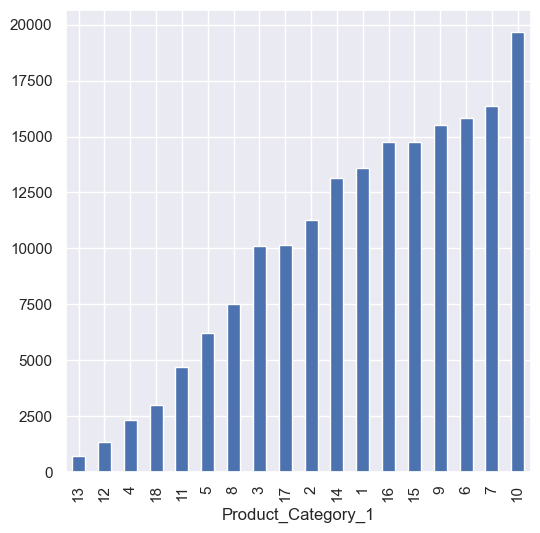

In [64]:
df.groupby("Product_Category_1")["Purchase"].mean().sort_values().plot(kind = "bar")

<Axes: xlabel='Product_ID'>

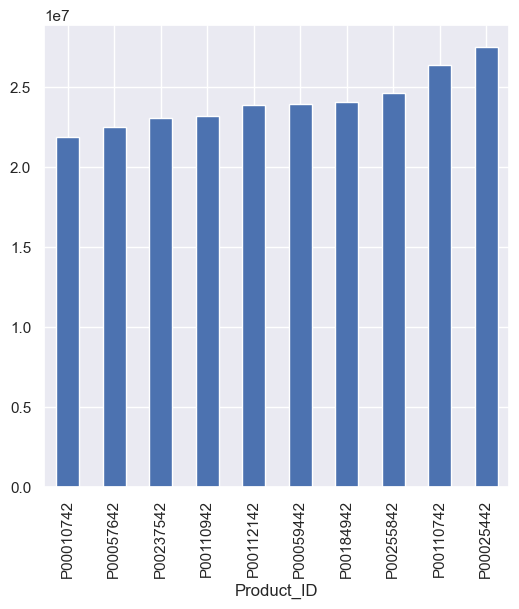

In [65]:
df.groupby("Product_ID")["Purchase"].sum().nlargest(10).sort_values().plot(kind = "bar")

<Axes: xlabel='Product_ID'>

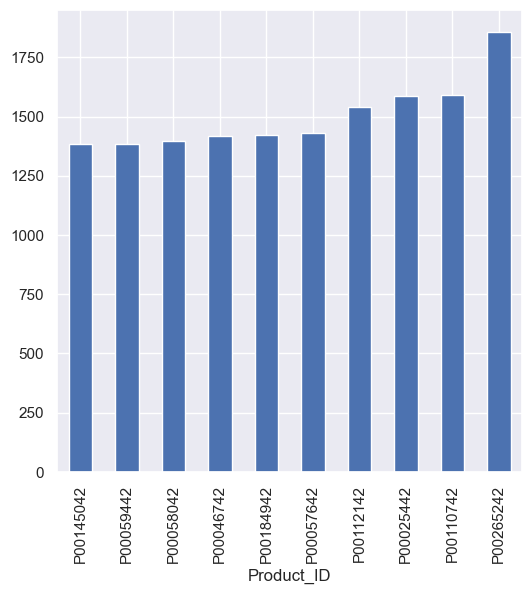

In [66]:
df.groupby("Product_ID").size().nlargest(10).sort_values().plot(kind = "bar")

<Axes: xlabel='Product_ID'>

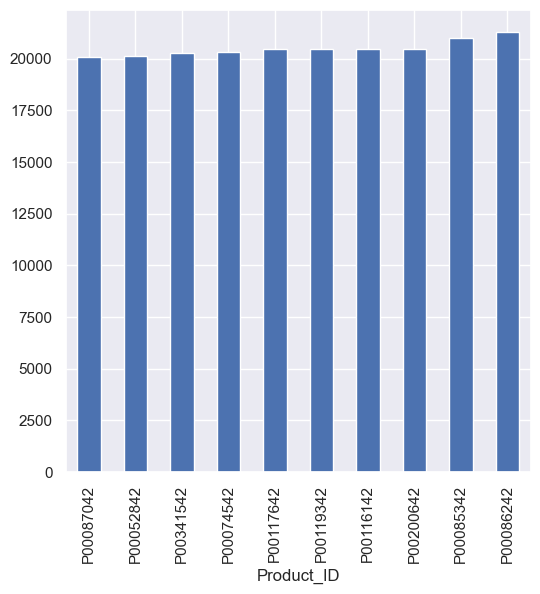

In [67]:
df.groupby("Product_ID")["Purchase"].mean().nlargest(10).sort_values().plot(kind = "bar")

<Axes: xlabel='Product_Category_1', ylabel='count'>

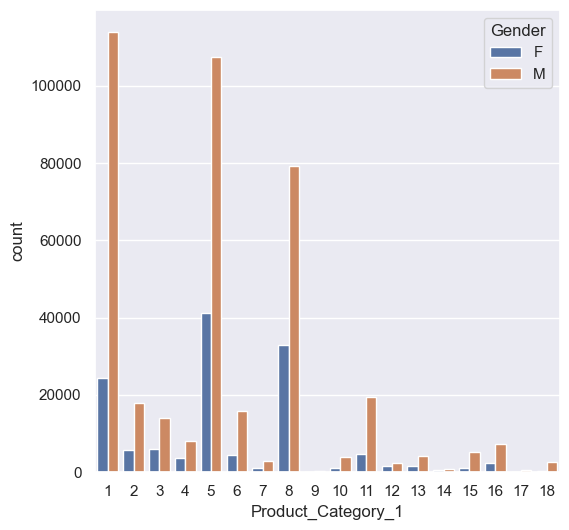

In [68]:
sns.countplot(x = "Product_Category_1", hue = "Gender", data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

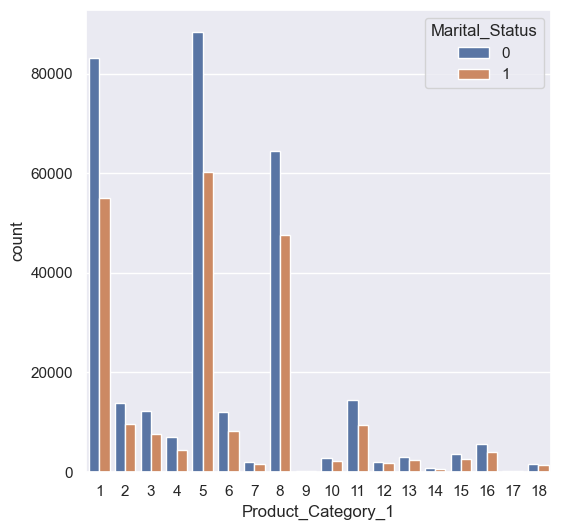

In [69]:
sns.countplot(x = "Product_Category_1", hue = "Marital_Status", data = df)

In [74]:
l = []
for i in range(len(df)):
    l.append(df["Gender"][i] +"_"+ str(df["Marital_Status"][i]))

df["MaritalGender"] = l

In [75]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

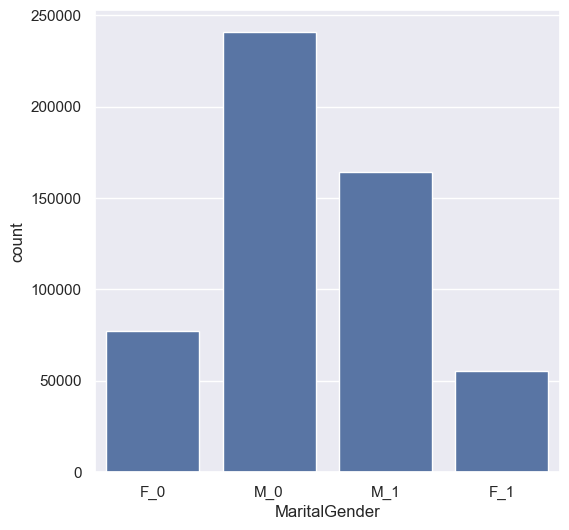

In [78]:
sns.countplot(x = df["MaritalGender"])

<Axes: xlabel='Age', ylabel='count'>

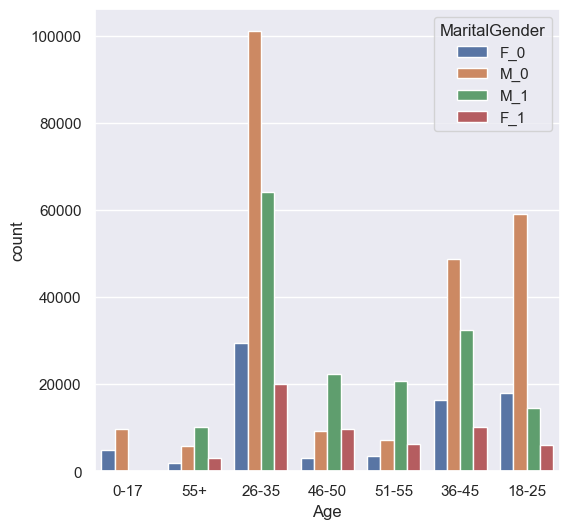

In [79]:
sns.countplot(x = df["Age"], hue = df["MaritalGender"])

<Axes: xlabel='Product_Category_1', ylabel='count'>

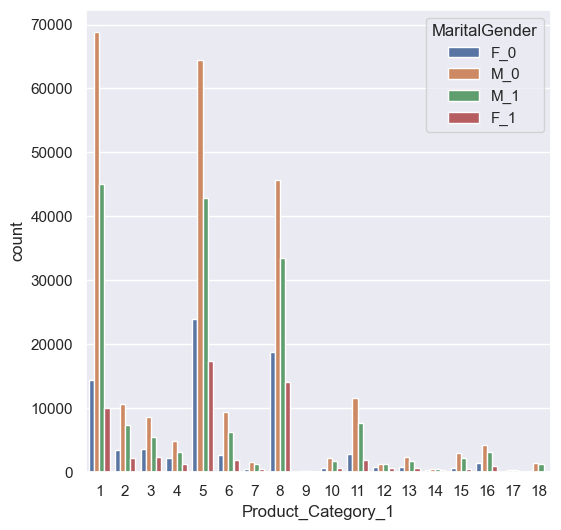

In [81]:
sns.countplot(x = df["Product_Category_1"], hue = df["MaritalGender"])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

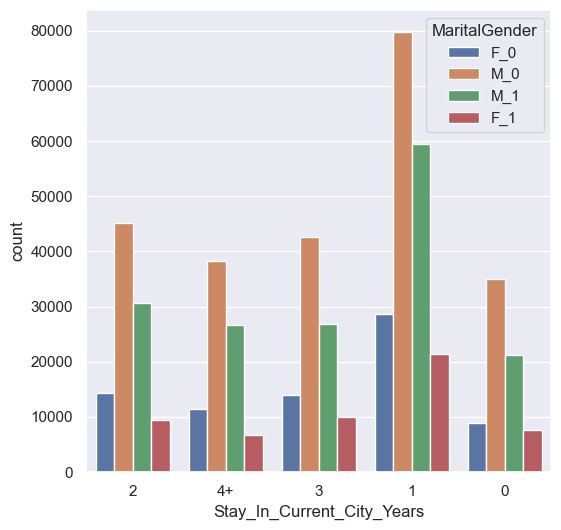

In [82]:
sns.countplot(x = df["Stay_In_Current_City_Years"], hue = df["MaritalGender"])

<Axes: xlabel='City_Category', ylabel='count'>

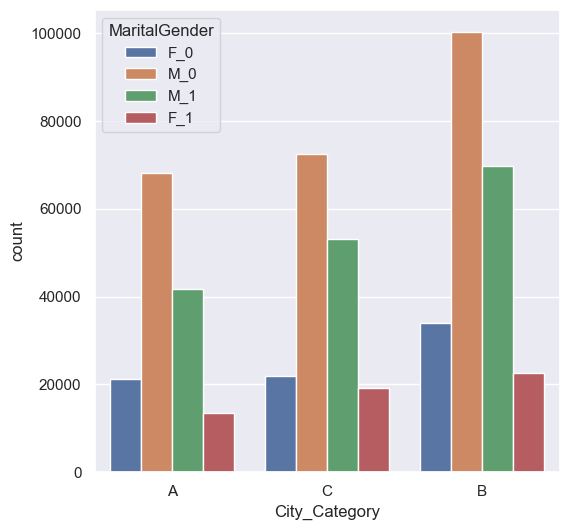

In [83]:
sns.countplot(x = df["City_Category"], hue = df["MaritalGender"])

<Axes: xlabel='Occupation', ylabel='count'>

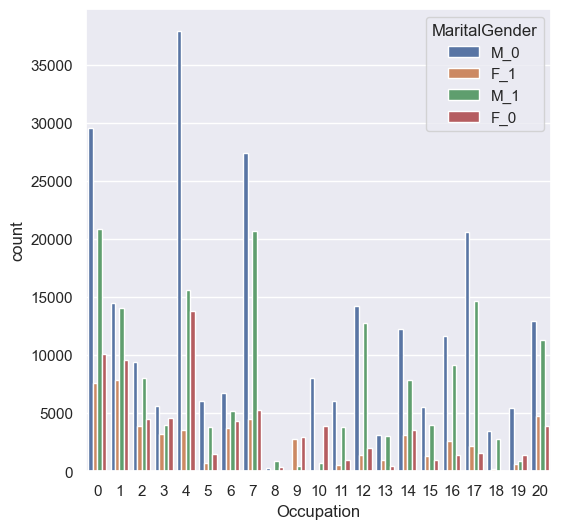

In [84]:
sns.countplot(x = df["Occupation"], hue = df["MaritalGender"])